# Introduction

For any segmentation exercise, we need to be able to answer this following questions:

- How do we choose the number of clusters?
- How do we evaluate the clusters statistically/numerically?
- Which is the best clustering algorithm for the task?

NOTE: The quantitative measures only tell us how well that number of clusters fits the data. They do not tell us how useful those clusters are for business.

There are two ways in which the clusters can turn out to be non-actionable:
- The cluster don't make business sense.
- The cluster are far too many.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mall0 = pd.read_csv('./dataset/Mall_Customers.csv')
print(mall0.info())
mall0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Rename some columns

mall0.rename({'Annual Income (k$)': 'Income',
              'Spending Score (1-100)': 'Spend_score'},
             axis=1, inplace=True)
mall0.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


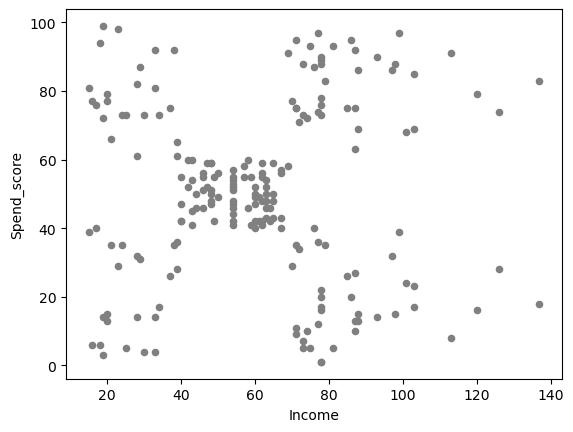

In [4]:
mall0.plot.scatter(x='Income', y='Spend_score', color='gray')
plt.show()

**Choosing the Number of Clusters Based on Visual Inspection**

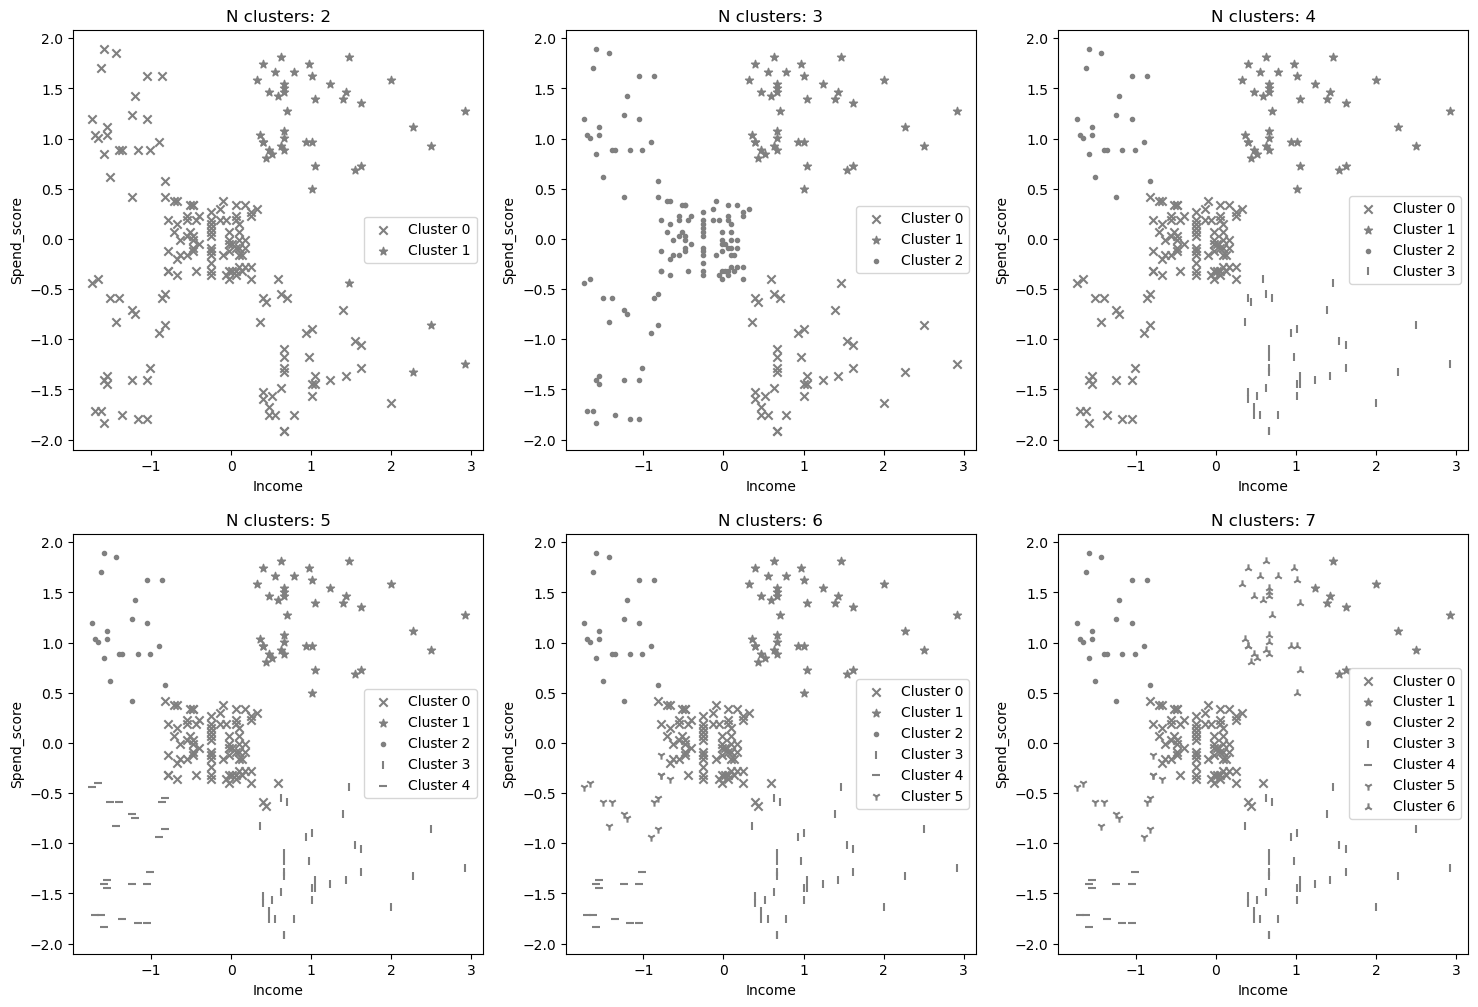

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

mall_scaled = mall0.copy()

# Standard Scaler
cols_to_scale = ['Age', 'Income', 'Spend_score']
scaler = StandardScaler()
mall_scaled[cols_to_scale] = scaler.fit_transform(mall_scaled[cols_to_scale])

# Clustering
cluster_cols = ['Income', 'Spend_score']
markers = ['x', '*', '.', '|', '_', '1', '2']

plt.figure(figsize=(18, 12))
for n in range(2, 8):
    model = KMeans(n_clusters=n, random_state=42)
    mall_scaled['Cluster'] = model.fit_predict(mall_scaled[cluster_cols])
    
    plt.subplot(2, 3, n-1)
    for clust in range(n):
        temp = mall_scaled[mall_scaled.Cluster == clust]
        plt.scatter(temp.Income, temp.Spend_score,
                    marker=markers[clust], label=f'Cluster {clust}',
                    color='gray')
        plt.title(f"N clusters: {n}")
        plt.xlabel("Income")
        plt.ylabel("Spend_score")
        plt.legend()
        
plt.show()

NOTES:
- The criteriation: (1) Avoid overlapping, (2) Fairly dense.
- Five clusters seem to capture things very well with clusters that are non-overlapping and are fairly dense.

**The Elbow Method with Sum of Squared Errors**

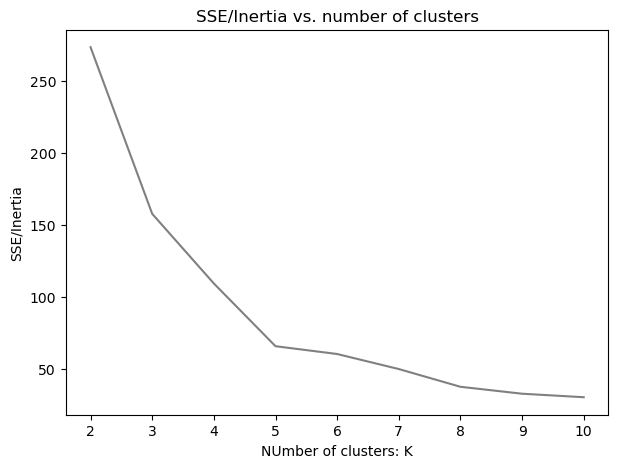

In [6]:
X = mall_scaled[cluster_cols]

inertia_scores = []
for K in range(2, 11):
    inertia = KMeans(n_clusters=K, random_state=42).fit(X).inertia_
    inertia_scores.append(inertia)
    

plt.figure(figsize=(7, 5))
plt.plot(range(2, 11), inertia_scores, color='gray')
plt.title('SSE/Inertia vs. number of clusters')
plt.xlabel("NUmber of clusters: K")
plt.ylabel("SSE/Inertia")
plt.show()

## Optimizing a Luxury Clothing Brand's Marketing Campaign using Clustering

The goal is to perform customer segmentation for the company which will help them optimize their campaign.



In [7]:
clothing0 = pd.read_csv('./dataset/Clothing_Customers.csv')
print(clothing0.info())
clothing0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   income               1000 non-null   int64
 1   age                  1000 non-null   int64
 2   days_since_purchase  1000 non-null   int64
 3   annual_spend         1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB
None


,income,age,days_since_purchase,annual_spend
0,37453,48,504,4441
1,50775,50,566,4239
2,71047,41,326,5834
3,52239,52,259,5456
4,112343,27,279,1749


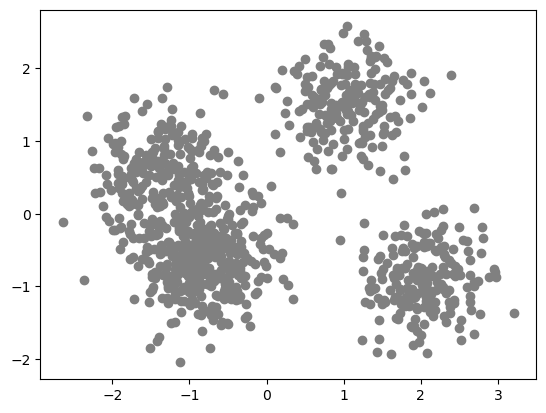

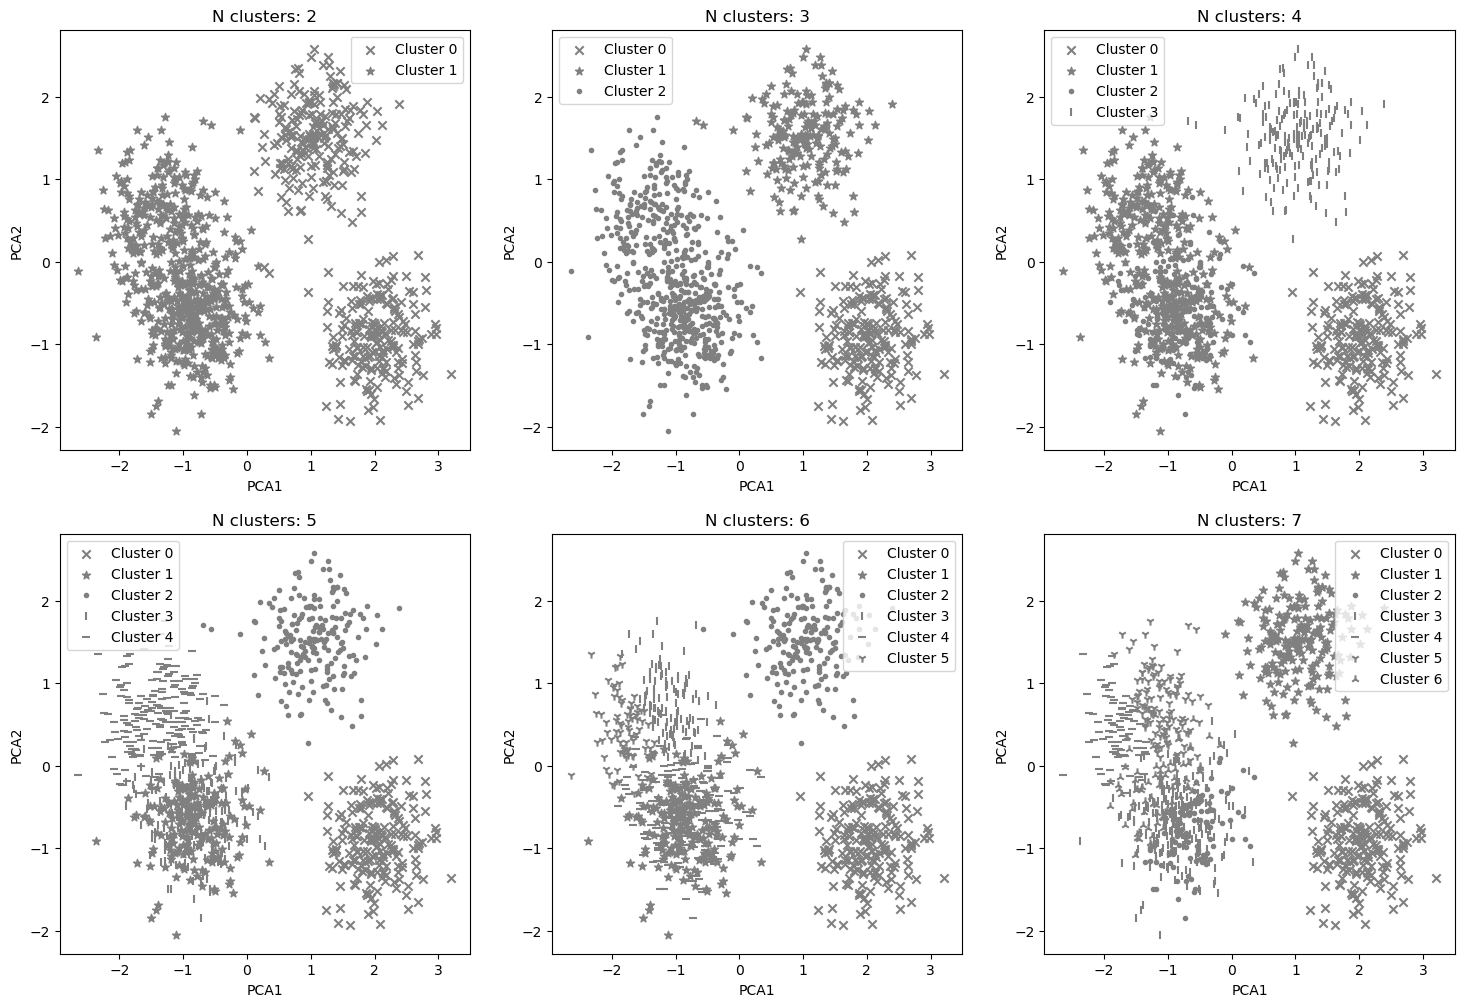

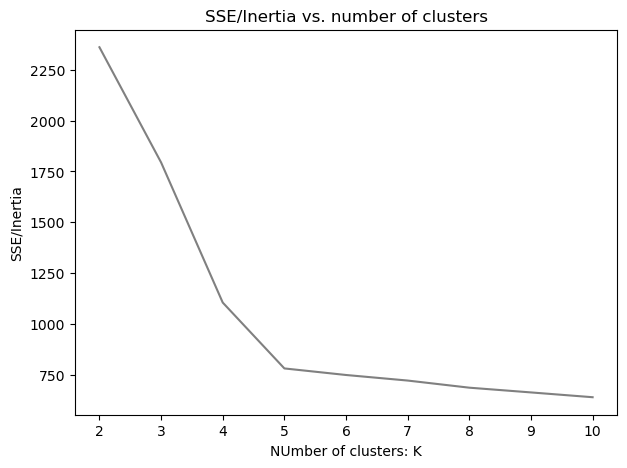

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Scaled data
sc = StandardScaler()
clothing_scaled = sc.fit_transform(clothing0.values)
clothing_scaled = pd.DataFrame(clothing_scaled, columns=clothing0.columns)

# Visualize data using PCA
pca = PCA(n_components=2)
result = pca.fit_transform(clothing_scaled)
plt.scatter(result[:, 0], result[:, 1], c='gray')
plt.show()

# Clustering
markers = ['x', '*', '.', '|', '_', '1', '2']

plt.figure(figsize=(18, 12))
for n in range(2, 8):
    model = KMeans(n_clusters=n, random_state=42)
    clothing_scaled['Cluster'] = model.fit_predict(clothing_scaled)
    
    clothing_scaled[['PCA1', 'PCA2']] = PCA(n_components=2)\
                                            .fit_transform(
                                                clothing_scaled[['income', 'age', 'days_since_purchase', 'annual_spend']])
    plt.subplot(2, 3, n-1)
    for clust in range(n):
        temp = clothing_scaled[clothing_scaled.Cluster == clust]
        
        plt.scatter(temp.PCA1, temp.PCA2,
                    marker=markers[clust], label=f'Cluster {clust}',
                    color='gray')
        plt.title(f"N clusters: {n}")
        plt.xlabel("PCA1")
        plt.ylabel("PCA2")
        plt.legend()
plt.show()

# Elbow method
X = sc.fit_transform(clothing0.values)

inertia_scores = []
for K in range(2, 11):
    inertia = KMeans(n_clusters=K, random_state=42).fit(X).inertia_
    inertia_scores.append(inertia)
    

plt.figure(figsize=(7, 5))
plt.plot(range(2, 11), inertia_scores, color='gray')
plt.title('SSE/Inertia vs. number of clusters')
plt.xlabel("Number of clusters: K")
plt.ylabel("SSE/Inertia")
plt.show()

NOTES:
- The elbow method suggests five clusters being optimal while the visual inspection method suggests 3.
- Recall that dimensionality-reduced data employing PCA loses some information in the dimensionality reduction process. The visual inspection method, therefore, is not completely reliable.

## Evaluating Clustering on Customer Data

In [57]:
df = pd.read_csv('./dataset/customer_offers.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       100 non-null    int64
 1   2       100 non-null    int64
 2   3       100 non-null    int64
 3   4       100 non-null    int64
 4   5       100 non-null    int64
 5   6       100 non-null    int64
 6   7       100 non-null    int64
 7   8       100 non-null    int64
 8   9       100 non-null    int64
 9   10      100 non-null    int64
 10  11      100 non-null    int64
 11  12      100 non-null    int64
 12  13      100 non-null    int64
 13  14      100 non-null    int64
 14  15      100 non-null    int64
 15  16      100 non-null    int64
 16  17      100 non-null    int64
 17  18      100 non-null    int64
 18  19      100 non-null    int64
 19  20      100 non-null    int64
 20  21      100 non-null    int64
 21  22      100 non-null    int64
 22  23      100 non-null    int64
 23  24      100 non-

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, random_state=100)

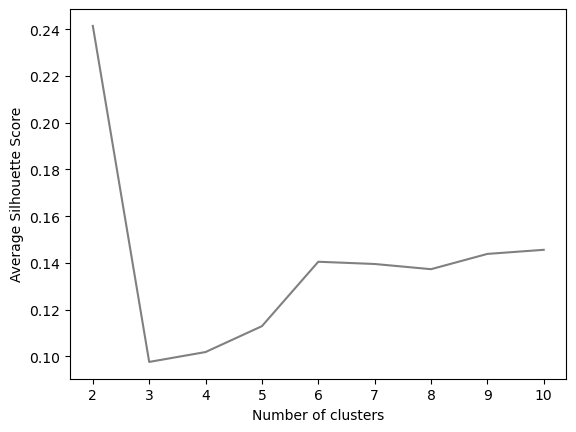

In [83]:
# Perform K-Means clustering
from sklearn.metrics import silhouette_score

krange = list(range(2, 11))
avg_silhouettes = []

for n in krange:
    model = KMeans(n_clusters=n, random_state=100)
    model.fit(X_train)
    cluster_assignments = model.predict(X_train)
    
    silhouette_avg = silhouette_score(X_train, 
                                      cluster_assignments)
    avg_silhouettes.append(silhouette_avg)

plt.plot(krange, avg_silhouettes, color='gray')
plt.xlabel("Number of clusters")
plt.ylabel("Average Silhouette Score")
plt.show()

In [81]:
model = KMeans(n_clusters=3, random_state=100)
model.fit(X_train)

km_labels = model.predict(X_test)
km_silhouette = silhouette_score(X_test, km_labels)

print('k-means silhouette score: ' + str(km_silhouette))

k-means silhouette score: 0.10519715296324078


In [85]:
# Perform mean-shift clustering on data.

from sklearn.cluster import estimate_bandwidth, MeanShift

bandwidth = estimate_bandwidth(X_train, quantile=0.1)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

ms_labels = ms.predict(X_test)

ms_silhouette = silhouette_score(X_test, ms_labels)
print(f"mean-shift silhouette score: " + str(ms_silhouette))

mean-shift silhouette score: 0.07308587709358311


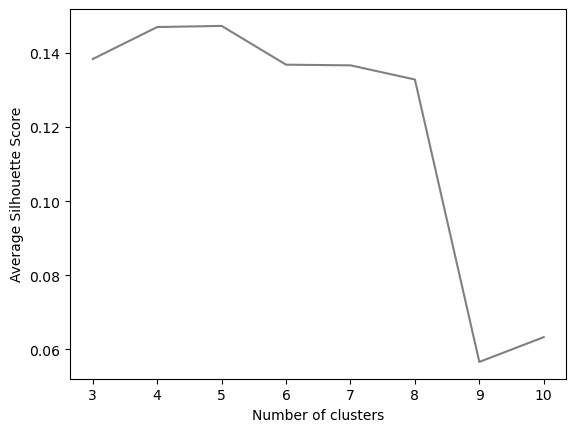

In [90]:
# Perform KModes clustering

from kmodes.kmodes import KModes

krange = list(range(3, 11))
avg_silhouettes = []

for n in krange:
    km = KModes(n_clusters=n, random_state=100)
    km.fit(X_train)
    
    kmode_labels = km.predict(X_train)
    kmode_silhouette = silhouette_score(X_train, kmode_labels)
    avg_silhouettes.append(kmode_silhouette)
    
plt.plot(krange, avg_silhouettes, color='gray')
plt.xlabel("Number of clusters")
plt.ylabel("Average Silhouette Score")
plt.show()

In [93]:
km = KModes(n_clusters=4, random_state=100)
km.fit(X_train)
kmode_labels = km.predict(X_test)
kmode_silhouette = silhouette_score(X_test, kmode_labels)
print('k-mode silhouette score: ' + str(kmode_silhouette))

k-mode silhouette score: 0.11750917239635501


Comparison model:
1. K-means silhouette score = 0.105
2. Mean-shift silhouette score = 0.073
3. K-modes silhouette score = 0.118


- The clusters from k-mode are the most stable and generalize well. The final number of clusters we use is 4. This number is not too low or high, as we discussed earlier, and is a convenient number for the business to work with.